In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


import os
from matplotlib import pyplot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore


import warnings                                                                 
warnings.filterwarnings('ignore') 

# allow plots to appear directly in the notebook
%matplotlib inline

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity

In [25]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [27]:
df.isnull().sum()#There are no nulls and there is no object type in data

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [28]:
df.describe()


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [6]:
df.shape

(30, 17)

In [15]:
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()


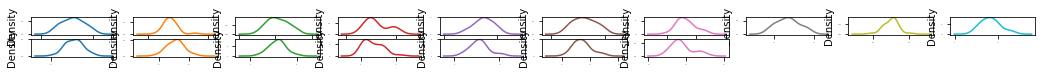

In [33]:
df.plot(kind='density', subplots=True, layout=(30, 10), sharex=False, legend=False, fontsize=1, figsize=(18,12))
plt.show()

### df.plot(kind='density', subplots=True, layout=(30, 3), sharex=False, legend=False, fontsize=1, figsize=(18,12))
plt.show()

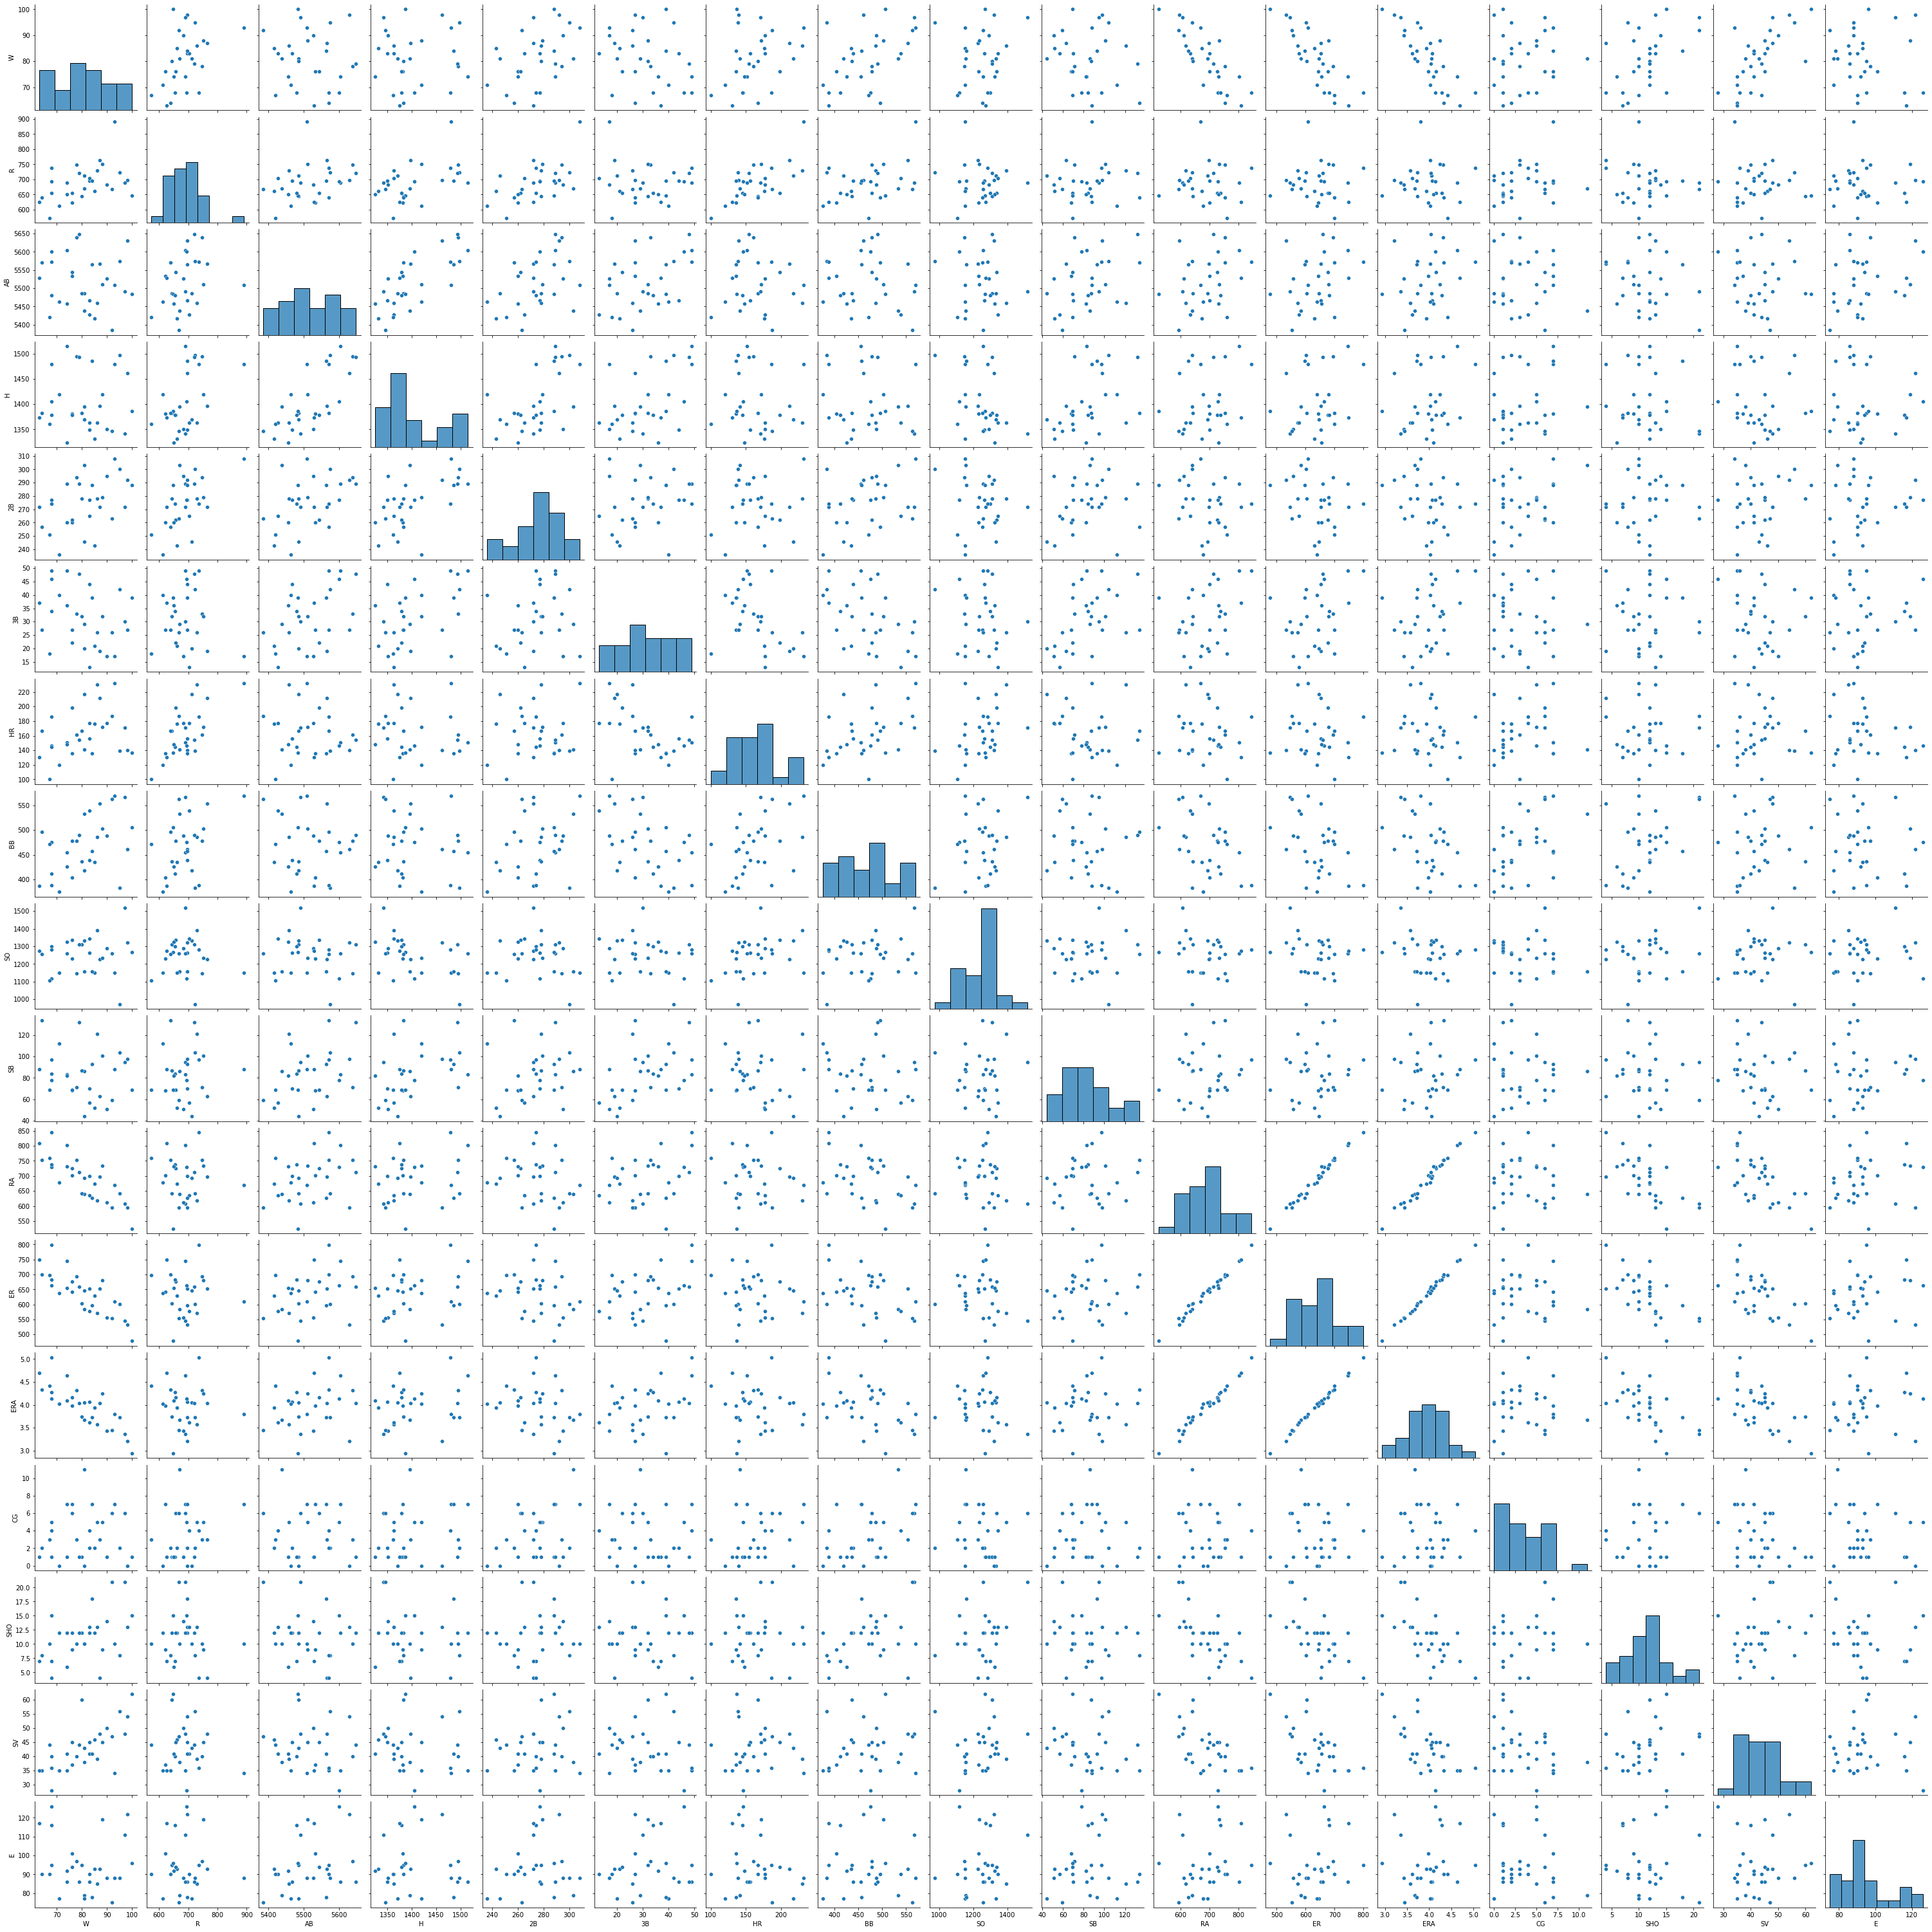

In [9]:
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.savefig('pairplot2.png')
plt.show()

<AxesSubplot:>

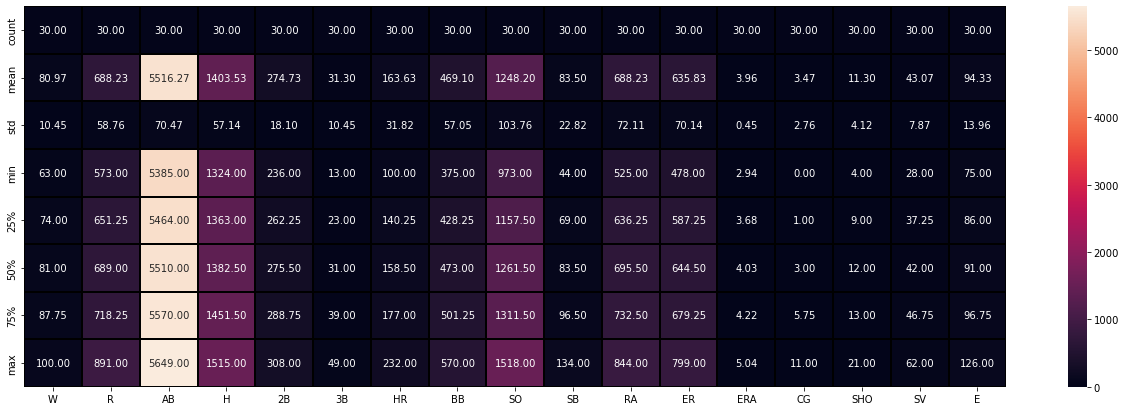

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [36]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

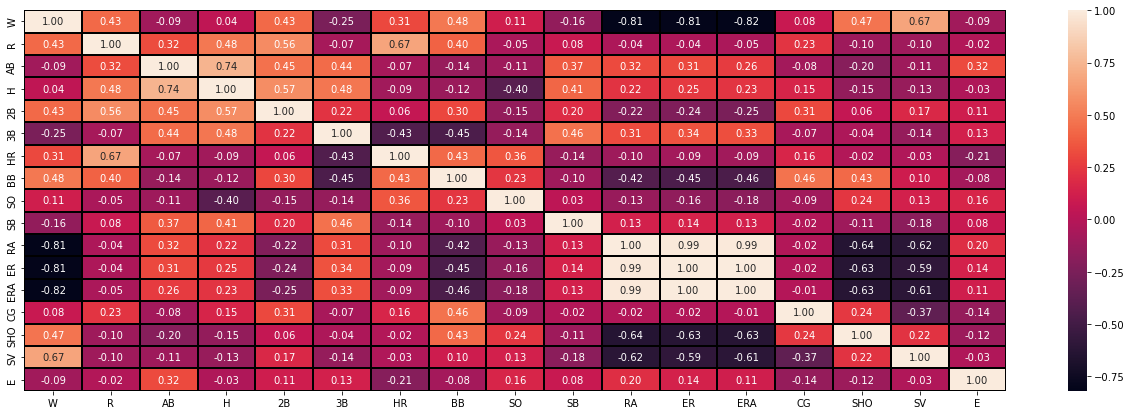

In [37]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [ ]:
#ERA, ER and RA seem to be  corelated with W
#RA seems to be closely related to 

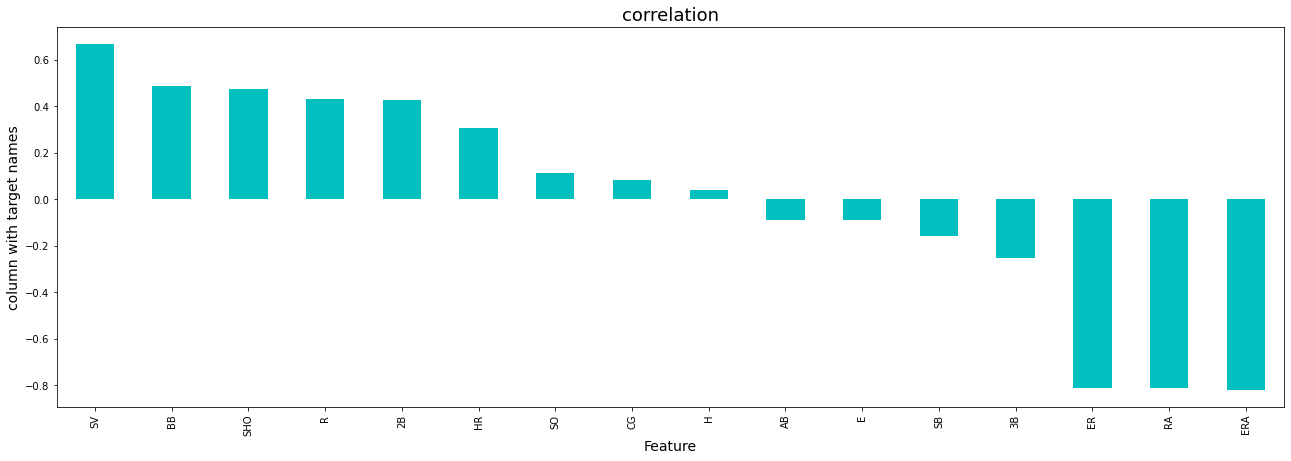

In [39]:
plt.figure(figsize=(22,7))
df.corr()['W'].sort_values(ascending=False).drop(["W"]).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation', fontsize=18)
plt.show()

In [ ]:
#SV is highly corelated to W

In [49]:
df.skew().sort_values(ascending=False)

R      1.200786
E      0.890132
CG     0.736845
H      0.670254
SV     0.657524
SHO    0.565790
HR     0.516441
SB     0.479893
AB     0.183437
BB     0.158498
3B     0.129502
ER     0.058710
ERA    0.053331
W      0.047089
RA     0.045734
SO    -0.156065
2B    -0.230650
dtype: float64

In [ ]:
#here we observed that R, E, CG, H ,SV,RA ER, ERA might have outliers
#Checking for outliers

<AxesSubplot:xlabel='R'>

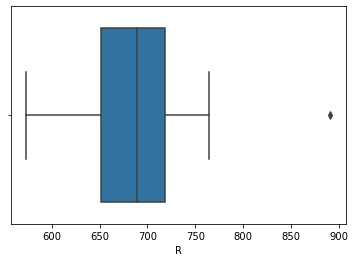

In [41]:
sns.boxplot(df["R"])

<AxesSubplot:xlabel='E'>

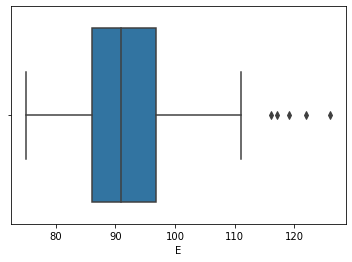

<AxesSubplot:xlabel='SV'>

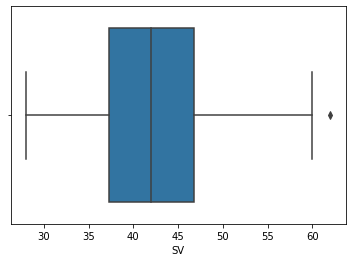

In [43]:
sns.boxplot(df["SV"])

<AxesSubplot:xlabel='CG'>

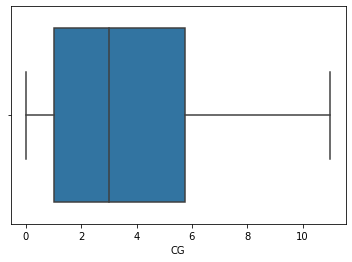

In [44]:
sns.boxplot(df["CG"])

<AxesSubplot:xlabel='H'>

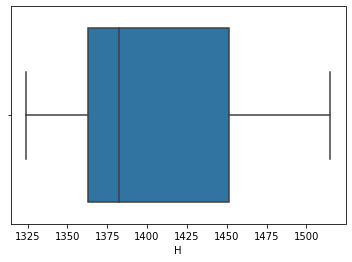

In [45]:
sns.boxplot(df["H"])

<AxesSubplot:xlabel='RA'>

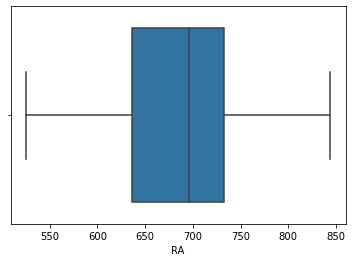

In [46]:
sns.boxplot(df["RA"])

<AxesSubplot:xlabel='ER'>

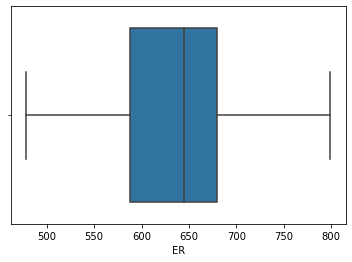

In [47]:
sns.boxplot(df["ER"])

<AxesSubplot:xlabel='ERA'>

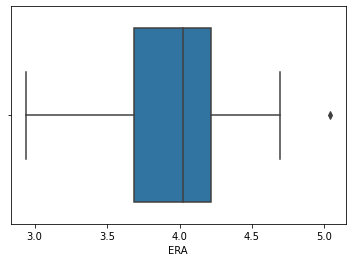

In [48]:
sns.boxplot(df["ERA"])

In [ ]:
#thus we can find there are outliers for ERA, SV and E

In [52]:
corr_matrix=df.corr()
corr_matrix["W"].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

In [53]:
x=df.drop("W", axis=1)
y=df["W"]

In [54]:
from sklearn.preprocessing import power_transform
X_new=power_transform(x)

In [55]:
X_new

array([[ 7.28217745e-01,  8.58727497e-01,  4.99600361e-16,
         1.47768528e+00,  1.03310301e+00, -7.64625858e-01,
        -1.61091476e+00, -2.56989562e+00,  9.39708194e-01,
        -6.60330958e-01, -4.97424688e-01, -5.00893458e-01,
        -3.59843640e-01, -7.89579375e-01,  1.54637800e+00,
        -3.34952500e-01],
       [ 2.61212021e-01, -7.01451399e-01, -3.05311332e-16,
         8.42687764e-02,  1.20332020e+00, -1.58581414e-01,
        -5.02748833e-01,  1.34912944e-01, -5.39693084e-01,
         1.75465358e-01,  2.57973512e-01,  2.61806186e-01,
        -3.59843640e-01,  2.51775365e-01,  3.60443861e-01,
        -5.32211279e-01],
       [-2.44821020e-01, -1.12609686e+00,  0.00000000e+00,
         1.67078208e+00, -1.60269866e-01, -6.89676290e-01,
         1.12829370e+00, -9.01253791e-01,  2.11955500e-01,
        -6.74620526e-01, -7.46906388e-01, -6.36459486e-01,
         1.99351257e+00, -2.45393455e-01, -6.07593604e-01,
        -1.34233137e+00],
       [-1.28512888e+00,  2.67369367e

In [57]:
pd.DataFrame(X_new, columns=x.columns).skew().sort_values(ascending=False)

AB     0.090410
E      0.063909
SO     0.041170
SHO    0.006560
ERA    0.001746
SV     0.000836
H      0.000000
HR    -0.000065
ER    -0.001940
BB    -0.007760
RA    -0.008082
SB    -0.010455
2B    -0.035315
R     -0.055006
CG    -0.059785
3B    -0.072933
dtype: float64

In [58]:
#as you can see the skewness is from 0.09 to -0.07
x.columns

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [59]:
x=pd.DataFrame(X_new, columns=x.columns)

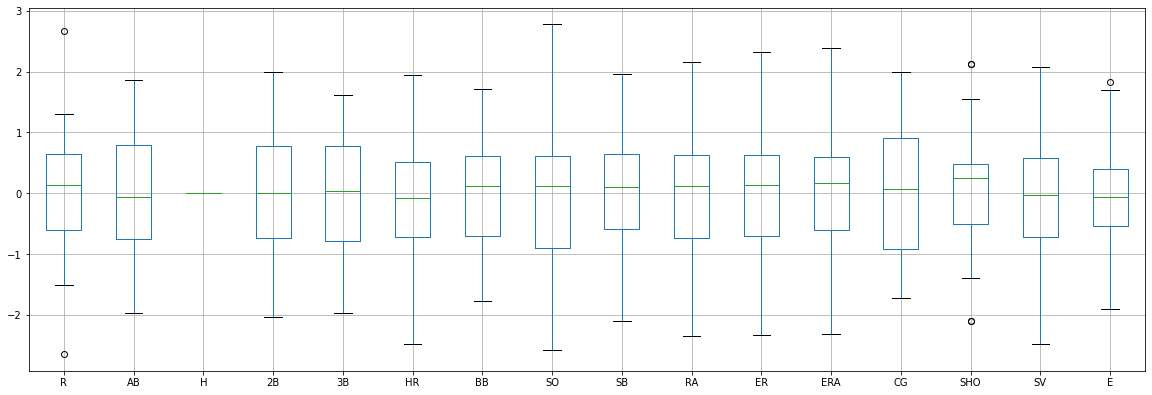

In [62]:
#Plotting boxplots for first 30 columns
x.iloc[:,0:17].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [ ]:
#there are not many outiers in the data set

In [65]:
#Lets Quantify
from scipy.stats import zscore
(np.abs(zscore(x))<3).all().all()

True

In [66]:
#There are no outliers in the data set
np.abs(zscore(x))<3

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
Linear regression — it is an algorithm that minimizes the loss function i.e summation of square error.
Decision Tree — It is a tree-based algorithm that uses the gini or entropy method to generate the tree.
Random forest- It is a multiple trees algorithm that uses bootstrap sampling and bagging for classification.
Extreme Gradient boosting — it is a boosting algorithm that uses a multi-decision tree.
Support vector machine- it constructs Hyperplane and marginal plane and distance between them is optimized.

In [71]:
(np.abs(zscore(x))<3).all()

R      True
AB     True
H      True
2B     True
3B     True
HR     True
BB     True
SO     True
SB     True
RA     True
ER     True
ERA    True
CG     True
SHO    True
SV     True
E      True
dtype: bool

In [117]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [118]:
from sklearn.model_selection import train_test_split
lr=LinearRegression()

In [119]:
from sklearn.metrics import r2_score
for i in range(0,200):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=50)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train, pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.965870633180067
At random state 0,the testing accuracy is:- 0.8142459553729354


At random state 1,the training accuracy is:- 0.965870633180067
At random state 1,the testing accuracy is:- 0.8142459553729354


At random state 2,the training accuracy is:- 0.965870633180067
At random state 2,the testing accuracy is:- 0.8142459553729354


At random state 3,the training accuracy is:- 0.965870633180067
At random state 3,the testing accuracy is:- 0.8142459553729354


At random state 4,the training accuracy is:- 0.965870633180067
At random state 4,the testing accuracy is:- 0.8142459553729354


At random state 5,the training accuracy is:- 0.965870633180067
At random state 5,the testing accuracy is:- 0.8142459553729354


At random state 6,the training accuracy is:- 0.965870633180067
At random state 6,the testing accuracy is:- 0.8142459553729354


At random state 7,the training accuracy is:- 0.965870633180067
At random state 7,the testing accuracy is

At random state 67,the testing accuracy is:- 0.8142459553729354


At random state 68,the training accuracy is:- 0.965870633180067
At random state 68,the testing accuracy is:- 0.8142459553729354


At random state 69,the training accuracy is:- 0.965870633180067
At random state 69,the testing accuracy is:- 0.8142459553729354


At random state 70,the training accuracy is:- 0.965870633180067
At random state 70,the testing accuracy is:- 0.8142459553729354


At random state 71,the training accuracy is:- 0.965870633180067
At random state 71,the testing accuracy is:- 0.8142459553729354


At random state 72,the training accuracy is:- 0.965870633180067
At random state 72,the testing accuracy is:- 0.8142459553729354


At random state 73,the training accuracy is:- 0.965870633180067
At random state 73,the testing accuracy is:- 0.8142459553729354


At random state 74,the training accuracy is:- 0.965870633180067
At random state 74,the testing accuracy is:- 0.8142459553729354


At random state 75,the t

At random state 138,the training accuracy is:- 0.965870633180067
At random state 138,the testing accuracy is:- 0.8142459553729354


At random state 139,the training accuracy is:- 0.965870633180067
At random state 139,the testing accuracy is:- 0.8142459553729354


At random state 140,the training accuracy is:- 0.965870633180067
At random state 140,the testing accuracy is:- 0.8142459553729354


At random state 141,the training accuracy is:- 0.965870633180067
At random state 141,the testing accuracy is:- 0.8142459553729354


At random state 142,the training accuracy is:- 0.965870633180067
At random state 142,the testing accuracy is:- 0.8142459553729354


At random state 143,the training accuracy is:- 0.965870633180067
At random state 143,the testing accuracy is:- 0.8142459553729354


At random state 144,the training accuracy is:- 0.965870633180067
At random state 144,the testing accuracy is:- 0.8142459553729354


At random state 145,the training accuracy is:- 0.965870633180067
At random s

In [131]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [133]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 4.034101538344217
MSE: 22.56621401524105
RMSE: 4.750390932885529


In [140]:
#With descision tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
predDT=dt.predict(x_test)

In [141]:
print('MAE:', metrics.mean_absolute_error(y_test, predDT))
print('MSE:', metrics.mean_squared_error(y_test, predDT))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predDT)))

MAE: 6.625
MSE: 79.125
RMSE: 8.895223437328598


In [142]:
#With random forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
predRF=rfr.predict(x_test)

In [143]:
print('MAE:', metrics.mean_absolute_error(y_test, predRF))
print('MSE:', metrics.mean_squared_error(y_test, predRF))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predRF)))

MAE: 5.97875
MSE: 51.30231249999999
RMSE: 7.162563263245916


In [144]:
#With ADAboost
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit (x_train,y_train)
predADA=ada.predict(x_test)


In [146]:
print('MAE:', metrics.mean_absolute_error(y_test, predADA))
print('MSE:', metrics.mean_squared_error(y_test, predADA))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predADA)))

MAE: 4.971230158730158
MSE: 33.67527242378432
RMSE: 5.803039929535581


,Y Test,Pred
17,97,84.500000
8,80,86.000000
28,74,74.666667
9,78,77.500000
18,68,69.500000


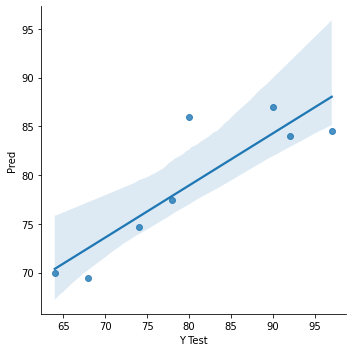

In [147]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [148]:
import pickle
filename='Basketball.pikl'
pickle.dump(lr, open(filename, 'wb'))